In [276]:
import pandas as pd
import numpy as np

In [277]:
train=pd.read_csv("../Dataset/predict_intro_extro_train.csv")
test=pd.read_csv("../Dataset/predict_intro_extro_test.csv")

In [278]:
train.drop(columns=["id"],inplace=True)
test.drop(columns=["id"],inplace=True)
train.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


# Identify Null/None Values

<Axes: >

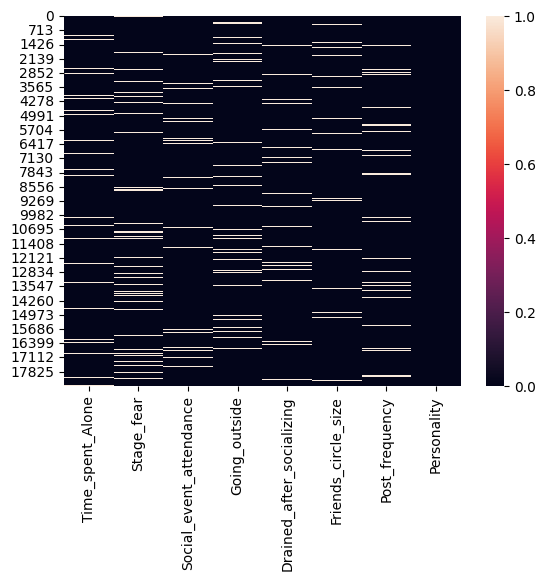

In [279]:
import seaborn as sns

sns.heatmap(train.isnull())

# Filling Methods

In [280]:
train.dtypes

Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
dtype: object

In [281]:
numaric_columns=train.select_dtypes("float64").columns.tolist()
object_columns=train.select_dtypes("object").columns.tolist()[:-1]  # Exclude 'Personality' column

In [282]:
numaric_columns, object_columns

(['Time_spent_Alone',
  'Social_event_attendance',
  'Going_outside',
  'Friends_circle_size',
  'Post_frequency'],
 ['Stage_fear', 'Drained_after_socializing'])

In [283]:
for column in numaric_columns:
    train[column]=train[column].fillna(train[column].bfill().ffill())

In [284]:
for column in object_columns:
    train[column]=train[column].fillna(train[column].bfill().ffill())

In [285]:
for column in numaric_columns:
    test[column]=test[column].fillna(test[column].bfill().ffill())
for column in object_columns:
    test[column]=test[column].fillna(test[column].bfill().ffill())

<Axes: >

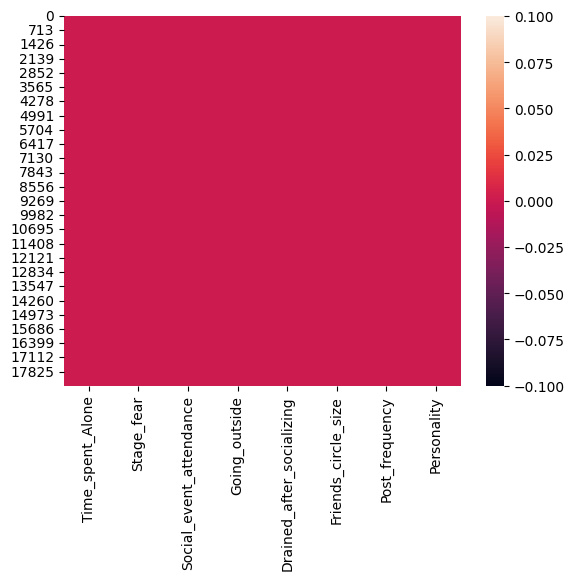

In [286]:
sns.heatmap(train.isnull())

In [287]:
train.shape, test.shape

((18524, 8), (6175, 7))

In [288]:
train["Post_frequency"].value_counts()

Post_frequency
3.0     2439
7.0     1963
5.0     1918
6.0     1899
9.0     1884
8.0     1846
4.0     1806
2.0     1370
0.0     1368
1.0     1310
10.0     721
Name: count, dtype: int64

# EDA Columns vs Target Relationship

<Axes: title={'center': 'Time Spend Alone and Personality Relationship'}, xlabel='Time_spent_Alone,Personality'>

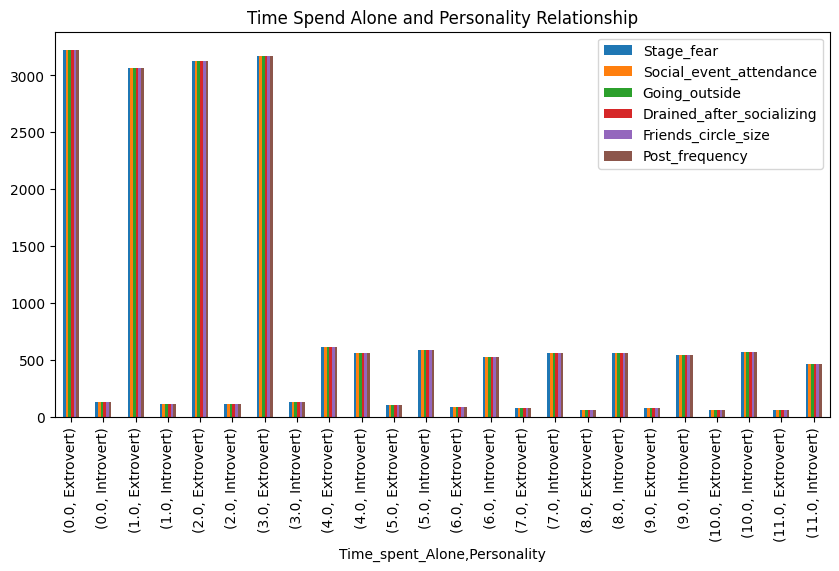

In [289]:
train.groupby(["Time_spent_Alone","Personality"]).count().plot(kind="bar", figsize=(10, 5), title="Time Spend Alone and Personality Relationship")

<Axes: title={'center': 'Friends Circle Size and Personality Relationship'}, xlabel='Friends_circle_size,Personality'>

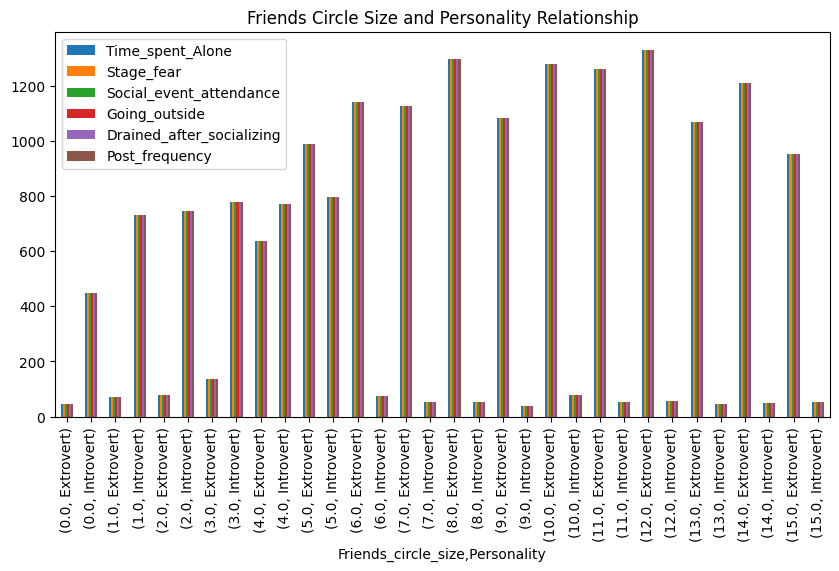

In [290]:
train.groupby(["Friends_circle_size","Personality"]).count().plot(kind="bar", figsize=(10, 5), title="Friends Circle Size and Personality Relationship")

<Axes: title={'center': 'Social Event Attendance and Personality Relationship'}, xlabel='Social_event_attendance,Personality'>

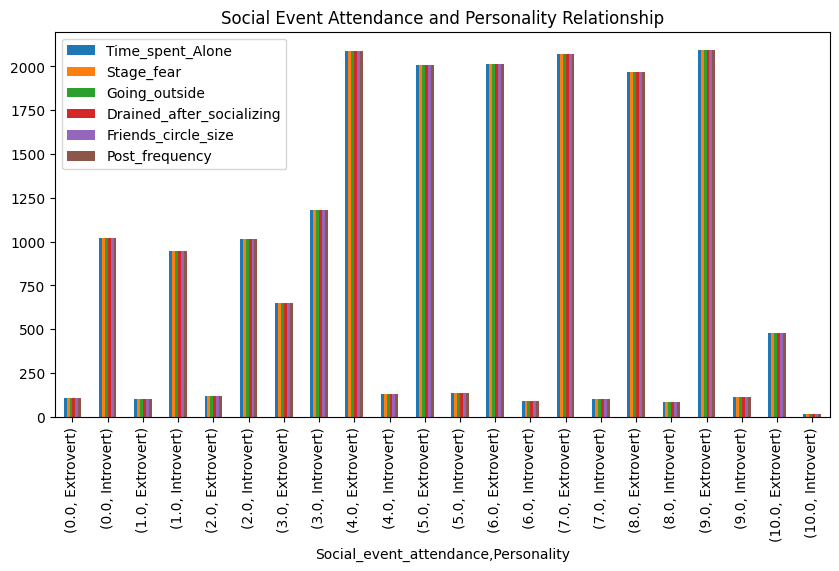

In [291]:
train.groupby(["Social_event_attendance","Personality"]).count().plot(kind="bar", figsize=(10, 5), title="Social Event Attendance and Personality Relationship")

<Axes: title={'center': 'Drained After Socializing and Personality Relationship'}, xlabel='Drained_after_socializing,Personality'>

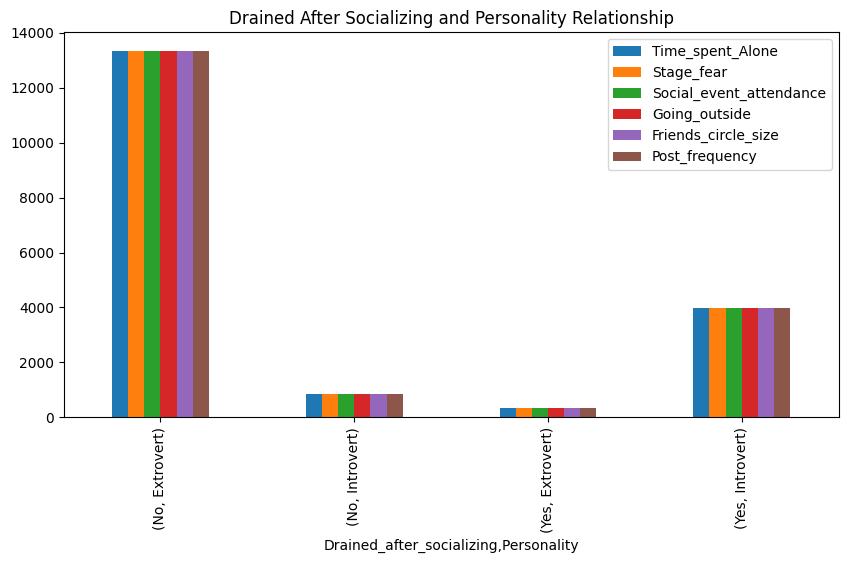

In [292]:
train.groupby(["Drained_after_socializing","Personality"]).count().plot(kind="bar", figsize=(10, 5), title="Drained After Socializing and Personality Relationship")

In [293]:
train.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,6.0,Yes,1.0,0.0,No,3.0,0.0,Introvert
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,1.0,No,4.0,4.0,No,13.0,3.0,Extrovert


I found this interesting pattern when friend circle, social attendance and personality are combined, interesting pattern is noticed

In [294]:
pd.options.display.max_rows = None
train.groupby(["Friends_circle_size","Social_event_attendance","Personality"]).count().tail(20)

Time_spent_Alone  \
Friends_circle_size Social_event_attendance Personality                     
15.0                1.0                     Extrovert                   3   
                                            Introvert                   5   
                    2.0                     Extrovert                   3   
                                            Introvert                   2   
                    3.0                     Extrovert                  21   
                                            Introvert                   3   
                    4.0                     Extrovert                 140   
                                            Introvert                   4   
                    5.0                     Extrovert                 149   
                                            Introvert                   9   
                    6.0                     Extrovert                 145   
                                            Introvert                  10   
                    7.0                     Extrovert                 158   
                                            Introvert                   7   
                    8.0                     Extrovert                 168   
                                            Introvert                   3   
                    9.0                     Extrovert                 138   
                                            Introvert                   4   
                    10.0                    Extrovert                  24   
                                            Introvert                   1   

                                                         Stage_fear  \
Friends_circle_size Social_event_attendance Personality               
15.0                1.0                     Extrovert             3   
                                            Introvert             5   
                    2.0                     Extrovert             3   
                                            Introvert             2   
                    3.0                     Extrovert            21   
                                            Introvert             3   
                    4.0                     Extrovert           140   
                                            Introvert             4   
                    5.0                     Extrovert           149   
                                            Introvert             9   
                    6.0                     Extrovert           145   
                                            Introvert            10   
                    7.0                     Extrovert           158   
                                            Introvert             7   
                    8.0                     Extrovert           168   
                                            Introvert             3   
                    9.0                     Extrovert           138   
                                            Introvert             4   
                    10.0                    Extrovert            24   
                                            Introvert             1   

                                                         Going_outside  \
Friends_circle_size Social_event_attendance Personality                  
15.0                1.0                     Extrovert                3   
                                            Introvert                5   
                    2.0                     Extrovert                3   
                                            Introvert                2   
                    3.0                     Extrovert               21   
                                            Introvert                3   
                    4.0                     Extrovert              140   
                                            Introvert                4   
                    5.0                     Extrovert      

# Feature Engineering

In [295]:
train["Personality"]=train["Personality"].map({"Introvert": 0, "Extrovert": 1})

In [296]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numaric_columns),
        ('cat', categorical_transformer, object_columns)
    ])

In [297]:
train["friend_social_multiplied"]=train["Friends_circle_size"] * train["Social_event_attendance"]
train["alone_social_multiplied"]=train["Time_spent_Alone"] * train["Social_event_attendance"]
train["friend_alone_multiplied"]=train["Friends_circle_size"] * train["Time_spent_Alone"]
train["social_post_multiplied"]=train["Social_event_attendance"] * train["Post_frequency"]
train["friend_post_multiplied"]=train["Friends_circle_size"] * train["Post_frequency"]
train["alone_post_multiplied"]=train["Time_spent_Alone"] * train["Post_frequency"]
train.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,friend_social_multiplied,alone_social_multiplied,friend_alone_multiplied,social_post_multiplied,friend_post_multiplied,alone_post_multiplied
0,0.0,No,6.0,4.0,No,15.0,5.0,1,90.0,0.0,0.0,30.0,75.0,0.0
1,1.0,No,7.0,3.0,No,10.0,8.0,1,70.0,7.0,10.0,56.0,80.0,8.0
2,6.0,Yes,1.0,0.0,No,3.0,0.0,0,3.0,6.0,18.0,0.0,0.0,0.0
3,3.0,No,7.0,3.0,No,11.0,5.0,1,77.0,21.0,33.0,35.0,55.0,15.0
4,1.0,No,4.0,4.0,No,13.0,3.0,1,52.0,4.0,13.0,12.0,39.0,3.0


In [298]:
test["friend_social_multiplied"]=test["Friends_circle_size"] * test["Social_event_attendance"]
test["alone_social_multiplied"]=test["Time_spent_Alone"] * test["Social_event_attendance"]
test["friend_alone_multiplied"]=test["Friends_circle_size"] * test["Time_spent_Alone"]
test["social_post_multiplied"]=test["Social_event_attendance"] * test["Post_frequency"]
test["friend_post_multiplied"]=test["Friends_circle_size"] * test["Post_frequency"]
test["alone_post_multiplied"]=test["Time_spent_Alone"] * test["Post_frequency"]

# Train Test Split and Model Train

### Method Deep Learning (ANN)

In [299]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split

In [300]:

X = train.drop(columns=["Personality"])
y_train = train["Personality"]

X_test = test

X_train, X_val, y_train, y_val = train_test_split(X, y_train, test_size=0.2, random_state=42)

X_train= preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

In [301]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.25),
    Dense(200, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision'])
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_56 (Dense)                │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 200)            │        25,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 64)             │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,753 (170.91 KB)

 Trainable params: 42,905 (167.60 KB)

 Non-trainable params: 848 (3.31 KB)

In [302]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='accuracy', factor=0.3, patience=10, min_lr=1e-6
)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy', patience=20, restore_best_weights=True
)

In [303]:
history=model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val), verbose=1,callbacks=[early_stopping,lr_scheduler])

Epoch 1/50
927/927 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - Precision: 0.9569 - accuracy: 0.9071 - loss: 0.2857 - val_Precision: 0.9762 - val_accuracy: 0.9684 - val_loss: 0.1492 - learning_rate: 0.0010
Epoch 2/50
927/927 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - Precision: 0.9569 - accuracy: 0.9071 - loss: 0.2857 - val_Precision: 0.9762 - val_accuracy: 0.9684 - val_loss: 0.1492 - learning_rate: 0.0010
Epoch 2/50
725/927 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.9716 - accuracy: 0.9616 - loss: 0.1687

KeyboardInterrupt: 

In [ ]:
predictions=model.predict(X_test)

193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step


In [ ]:
predictions

array([[0.99480176],
       [0.06622532],
       [0.9739463 ],
       ...,
       [0.9976139 ],
       [0.99645126],
       [0.05270485]], dtype=float32)

In [ ]:
predictions=np.array(predictions) >= 0.5
predictions=predictions.astype(int)
predictions[:50]
predictions=predictions.flatten()
predictions

array([1, 0, 1, ..., 1, 1, 0])

### Solution 1: Advanced Ensemble (XGBoost + LightGBM + CatBoost)

In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Prepare data for ensemble
X = train.drop(columns=["Personality"])
y = train["Personality"]

# Transform the data using the preprocessor for the ensemble
X_transformed = preprocessor.fit_transform(X)
test_transformed = preprocessor.transform(test)

# Define optimized models with single-threaded execution to avoid Windows multiprocessing issues
xgb_model = XGBClassifier(
    n_estimators=1000,
    max_depth=6,
    learning_rate=0.02,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42,
    eval_metric='logloss',
    n_jobs=1  # Single-threaded to avoid multiprocessing issues
)

lgb_model = LGBMClassifier(
    n_estimators=1000,
    max_depth=6,
    learning_rate=0.02,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42,
    verbose=-1,
    n_jobs=1,  # Single-threaded to avoid multiprocessing issues
    force_row_wise=True  # Additional parameter to avoid potential issues
)

cat_model = CatBoostClassifier(
    iterations=1000,
    depth=6,
    learning_rate=0.02,
    l2_leaf_reg=3,
    border_count=254,
    random_state=42,
    verbose=False,
    thread_count=1  # Single-threaded for CatBoost
)

# Create ensemble
ensemble_model = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('cat', cat_model)
    ],
    voting='soft'  # Use probability averages
)

print("Training ensemble model...")
ensemble_model.fit(X_transformed, y)

# Make predictions
ensemble_predictions = ensemble_model.predict_proba(test_transformed)[:, 1]
ensemble_predictions_binary = (ensemble_predictions >= 0.5).astype(int)

print(f"Ensemble predictions shape: {ensemble_predictions.shape}")
print(f"Sample predictions: {ensemble_predictions[:10]}")

Training ensemble model...


  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Ensemble predictions shape: (6175,)
Sample predictions: [0.99615647 0.04594385 0.97107619 0.99555267 0.03954717 0.99606541
 0.97134027 0.04650644 0.99742783 0.00811369]


### Alternative: Windows-Compatible Ensemble (Sequential Training)

In [305]:
# Alternative approach: Train models individually to avoid multiprocessing issues
import os
os.environ['JOBLIB_TEMP_FOLDER'] = 'C:/temp'  # Set temporary folder
os.environ['OMP_NUM_THREADS'] = '1'  # Limit OpenMP threads

print("Training individual models sequentially...")

# Prepare data
X = train.drop(columns=["Personality"])
y = train["Personality"]
X_transformed = preprocessor.fit_transform(X)
test_transformed = preprocessor.transform(test)

# Train XGBoost
print("Training XGBoost...")
xgb_simple = XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    random_state=42,
    n_jobs=1,
    eval_metric='logloss'
)
xgb_simple.fit(X_transformed, y)
xgb_pred = xgb_simple.predict_proba(test_transformed)[:, 1]
print(f"XGBoost training completed. Sample predictions: {xgb_pred[:5]}")

# Train LightGBM  
print("Training LightGBM...")
lgb_simple = LGBMClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    random_state=42,
    n_jobs=1,
    verbose=-1,
    force_row_wise=True
)
lgb_simple.fit(X_transformed, y)
lgb_pred = lgb_simple.predict_proba(test_transformed)[:, 1]
print(f"LightGBM training completed. Sample predictions: {lgb_pred[:5]}")

# Train CatBoost
print("Training CatBoost...")
cat_simple = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.05,
    random_state=42,
    verbose=False,
    thread_count=1
)
cat_simple.fit(X_transformed, y)
cat_pred = cat_simple.predict_proba(test_transformed)[:, 1]
print(f"CatBoost training completed. Sample predictions: {cat_pred[:5]}")

# Manual ensemble (average predictions)
ensemble_pred_manual = (xgb_pred + lgb_pred + cat_pred) / 3
ensemble_pred_binary = (ensemble_pred_manual >= 0.5).astype(int)

print(f"\nManual ensemble completed!")
print(f"Final ensemble predictions shape: {ensemble_pred_manual.shape}")
print(f"Sample ensemble predictions: {ensemble_pred_manual[:10]}")
print(f"Prediction distribution: {np.bincount(ensemble_pred_binary)}")

# Store the manual ensemble results
ensemble_predictions = ensemble_pred_manual
ensemble_predictions_binary = ensemble_pred_binary

Training individual models sequentially...
Training XGBoost...
XGBoost training completed. Sample predictions: [0.9983998  0.07013725 0.961757   0.9959092  0.04356206]
Training LightGBM...
LightGBM training completed. Sample predictions: [0.99840019 0.05199698 0.96053207 0.99550519 0.0392019 ]
Training CatBoost...
CatBoost training completed. Sample predictions: [0.98598455 0.03784782 0.96655639 0.99089889 0.05933945]

Manual ensemble completed!
Final ensemble predictions shape: (6175,)
Sample ensemble predictions: [0.99426151 0.05332735 0.96294849 0.99410443 0.0473678  0.9957347
 0.97429898 0.05445739 0.99832035 0.00823962]
Prediction distribution: [1552 4623]


In [306]:
predictions=ensemble_pred_binary

### Method YDF (97.2469)

In [ ]:
# import ydf

# model = ydf.GradientBoostedTreesLearner(
#     label="Personality",
#     categorical_algorithm="RANDOM",
#     use_hessian_gain=True,
#     max_depth=7,
#     num_candidate_attributes_ratio=0.9,
#     min_examples=10,
#     growing_strategy="BEST_FIRST_GLOBAL",
#     split_axis="SPARSE_OBLIQUE",
#     sparse_oblique_normalization="MIN_MAX",
#     sparse_oblique_num_projections_exponent=1.5,

#     ).train(train)
# model.describe()

In [ ]:
# model.label_classes()

### Method Catboost ( 97.2469)

In [ ]:
# from catboost import CatBoostClassifier

# catboost = {
#     'iterations': 1500,
#     'learning_rate': 0.001,
#     'depth': 10,
#     'l2_leaf_reg': 3,
#     'border_count': 130,
#     'bagging_temperature': 1,
#     'random_strength': 1,
#     'loss_function': 'Logloss',
#     'eval_metric': 'Accuracy',
#     'verbose': 0,
#     'random_state': 42
# }

In [ ]:
# from sklearn.model_selection import train_test_split
# X = train.drop(columns=["Personality"])
# y_train = train["Personality"]

In [ ]:
# from catboost import CatBoostClassifier

# model=CatBoostClassifier(**catboost)
# model.fit(X, y_train, cat_features=object_columns)

In [ ]:
# predictions = model.predict(test)

In [ ]:
# predictions

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [ ]:
# predictions=np.array(predictions) >= 0.5
# predictions=predictions.astype(int)
# predictions[:50]

In [ ]:
# from sklearn.model_selection import train_test_split

# X = train.drop(columns=["Personality"])
# y = train["Personality"]


### Method Random Forest (97.0040)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# model=RandomForestClassifier(n_estimators=5000, random_state=42)

# model.fit(X, y)

In [ ]:
# test= preprocessor.transform(test)
# predictions = model.predict(test)

In [ ]:
# predictions[:50]

# Submission Conversion

In [307]:
def prediction_convert(predictions):
    return ["Introvert" if pred == 0 else "Extrovert" for pred in predictions]

converted_predictions = prediction_convert(predictions)

In [308]:
test=pd.read_csv("../Dataset/predict_intro_extro_test.csv")
test=test["id"]

submission = pd.DataFrame({
    "id": test,
    "Personality": converted_predictions
})
submission.head()


,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert


In [309]:
submission.shape

(6175, 2)

In [310]:
submission.to_csv("intro_extro_predictions.csv", index=False)